# Web Scraping: Tripadvisor Restaurants in Baltimore

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
headers = {
        'Access-Control-Allow-Origin': '*',
        'Access-Control-Allow-Methods': 'GET',
        'Access-Control-Allow-Headers': 'Content-Type',
        'accept': '*/*',
        'accept-encoding': 'gzip, deflate',
        'accept-language': 'en,mr;q=0.9',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'}


In [3]:
# Lists to store extracted data
names=[]
total_rating=[]
cuisines=[]
prices=[]
stars=[]
#reviews=[]

In [4]:
# Data Extraction (Reference for loop range and next page url: https://stackoverflow.com/questions/39922317/for-loop-trying-to-scrape-tripadvisor-restaurant-data )
for i in range(0,180,30):
    print(i)
    url1 = 'https://www.tripadvisor.com/Restaurants-g60811-oa' + str(i) + '-Baltimore_Maryland.html#EATERY_LIST_CONTENTS'
    print(url1)
    r1 = requests.get(url1,headers=headers)
    soup = BeautifulSoup(r1.content, 'html.parser')

    #review = soup.find_all(class_="XllAv H4 _a").get_text()
    #print(review)
    for x in soup.body.find_all(class_="cauvp Gi o"):
        name = x.find(class_="bHGqj Cj b").get_text(strip=True)
        names.append(name)
        
        rating_no = x.find(class_="NoCoR").get_text(strip=True)
        total_rating.append(rating_no)
        #print(rating_no)
    
        span_f = x.find("div",class_="bhDlF bPJHV eQXRG")
    
        cuisine=span_f.find("span",class_="ceUbJ").contents[0]
        cuisines.append(cuisine)
    
        price=span_f.find_next("span",class_="ceUbJ").find_next("span",class_="ceUbJ").get_text(strip=True)
        prices.append(price)
    
        star=x.find(class_="RWYkj d H0")["aria-label"]
        stars.append(star)
        #print(star)

0
https://www.tripadvisor.com/Restaurants-g60811-oa0-Baltimore_Maryland.html#EATERY_LIST_CONTENTS
30
https://www.tripadvisor.com/Restaurants-g60811-oa30-Baltimore_Maryland.html#EATERY_LIST_CONTENTS
60
https://www.tripadvisor.com/Restaurants-g60811-oa60-Baltimore_Maryland.html#EATERY_LIST_CONTENTS
90
https://www.tripadvisor.com/Restaurants-g60811-oa90-Baltimore_Maryland.html#EATERY_LIST_CONTENTS
120
https://www.tripadvisor.com/Restaurants-g60811-oa120-Baltimore_Maryland.html#EATERY_LIST_CONTENTS
150
https://www.tripadvisor.com/Restaurants-g60811-oa150-Baltimore_Maryland.html#EATERY_LIST_CONTENTS


In [5]:
#for name in names:
#    print(name)

In [6]:
#for c in cuisines:
#    print(c)
#len(cuisines)
    
#for p in prices:
#    print(p)
    
#for s in stars:
#    print(s)

In [7]:
# Storing data as dataframe 


baltimore_restaurants = pd.DataFrame({'restaurant': names,
                              'cuisine': cuisines,
                              'price': prices,
                              'star': stars,
                                     'review count':total_rating})
print(baltimore_restaurants.info())
baltimore_restaurants.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   restaurant    180 non-null    object
 1   cuisine       180 non-null    object
 2   price         180 non-null    object
 3   star          180 non-null    object
 4   review count  180 non-null    object
dtypes: object(5)
memory usage: 7.2+ KB
None


,restaurant,cuisine,price,star,review count
0,1.Di Pasquale's Italian Marketplace & Deli,"Italian, Pizza",$$ - $$$,5.0 of 5 bubbles,694reviews
1,2.Joe Benny's Focacceria,"Italian, Pizza",$$ - $$$,5.0 of 5 bubbles,215reviews
2,3.Charleston Restaurant,American,$$$$,4.5 of 5 bubbles,943reviews
3,4.La Tavola,"Seafood, Italian",$$ - $$$,4.5 of 5 bubbles,682reviews
4,5.Thames Street Oyster House,"American, Bar",$$ - $$$,4.5 of 5 bubbles,"2,105reviews"


In [8]:
baltimore_restaurants = baltimore_restaurants[['restaurant', 'cuisine', 'price', 'star','review count']]
baltimore_restaurants.head()

,restaurant,cuisine,price,star,review count
0,1.Di Pasquale's Italian Marketplace & Deli,"Italian, Pizza",$$ - $$$,5.0 of 5 bubbles,694reviews
1,2.Joe Benny's Focacceria,"Italian, Pizza",$$ - $$$,5.0 of 5 bubbles,215reviews
2,3.Charleston Restaurant,American,$$$$,4.5 of 5 bubbles,943reviews
3,4.La Tavola,"Seafood, Italian",$$ - $$$,4.5 of 5 bubbles,682reviews
4,5.Thames Street Oyster House,"American, Bar",$$ - $$$,4.5 of 5 bubbles,"2,105reviews"


In [9]:
# Pre-processing of ratings to remove numbers from the string

baltimore_restaurants['restaurant'] = baltimore_restaurants['restaurant'].str.replace('[^a-zA-Z]', '')

<ipython-input-9-8c5f32249cf5>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  baltimore_restaurants['restaurant'] = baltimore_restaurants['restaurant'].str.replace('[^a-zA-Z]', '')


In [10]:
# Pre-processing of ratings and conveting it into numeric type
baltimore_restaurants['rating'] = pd.to_numeric(baltimore_restaurants['star'].str[:4])
baltimore_restaurants['rating']

0      5.0
1      5.0
2      4.5
3      4.5
4      4.5
      ... 
175    4.0
176    4.0
177    5.0
178    4.5
179    4.0
Name: rating, Length: 180, dtype: float64

In [11]:
baltimore_restaurants.head()

,restaurant,cuisine,price,star,review count,rating
0,DiPasqualesItalianMarketplaceDeli,"Italian, Pizza",$$ - $$$,5.0 of 5 bubbles,694reviews,5.0
1,JoeBennysFocacceria,"Italian, Pizza",$$ - $$$,5.0 of 5 bubbles,215reviews,5.0
2,CharlestonRestaurant,American,$$$$,4.5 of 5 bubbles,943reviews,4.5
3,LaTavola,"Seafood, Italian",$$ - $$$,4.5 of 5 bubbles,682reviews,4.5
4,ThamesStreetOysterHouse,"American, Bar",$$ - $$$,4.5 of 5 bubbles,"2,105reviews",4.5


In [12]:
del baltimore_restaurants['star']

In [13]:
# Unique combinations of cuisines in Baltimore
baltimore_restaurants['cuisine'].unique()

array(['Italian, Pizza', 'American', 'Seafood, Italian', 'American, Bar',
       'Italian', 'American, Steakhouse', 'Middle Eastern, Afghani',
       'Mediterranean, Greek', 'Italian, Tuscan', 'Italian, European',
       'American, Cafe', 'American, Seafood', 'Mediterranean, European',
       'French, European', 'Mediterranean, Seafood',
       'Steakhouse, Brazilian', 'Irish, Bar', 'Spanish',
       'American, Contemporary', 'Diner, American', 'Indian, Asian',
       'American, Mediterranean', 'American, Wine Bar',
       'Lebanese, Mediterranean', 'American, Diner', 'Seafood, Bar',
       'American, Cajun & Creole', 'American, Pub', 'Bar, Pizza',
       'Pizza, Italian', 'Peruvian, Latin', 'Latin, Central American',
       'Italian, Bar', 'Italian, Sicilian', 'Seafood, American',
       'American, Irish', 'American, Deli', 'Seafood, Mediterranean',
       'Asian, Japanese', 'Mexican, Street Food', 'Venezuelan, Latin',
       'Latin, Bar', 'Mexican, Southwestern', 'American, Southwest

In [14]:
# Minimum and maximum rating present in data
baltimore_restaurants.describe().loc[['min', 'max'], ['rating']]

,rating
min,3.5
max,5.0


In [15]:
# Regular expression for removing alphabets from review count 

baltimore_restaurants['total review count'] = baltimore_restaurants['review count'].str.replace(",","")
baltimore_restaurants['total review count'] = baltimore_restaurants['total review count'].str.replace('[^0-9]', '')

baltimore_restaurants

<ipython-input-15-eaf846669daa>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  baltimore_restaurants['total review count'] = baltimore_restaurants['total review count'].str.replace('[^0-9]', '')


,restaurant,cuisine,price,review count,rating,total review count
0,DiPasqualesItalianMarketplaceDeli,"Italian, Pizza",$$ - $$$,694reviews,5.0,694
1,JoeBennysFocacceria,"Italian, Pizza",$$ - $$$,215reviews,5.0,215
2,CharlestonRestaurant,American,$$$$,943reviews,4.5,943
3,LaTavola,"Seafood, Italian",$$ - $$$,682reviews,4.5,682
4,ThamesStreetOysterHouse,"American, Bar",$$ - $$$,"2,105reviews",4.5,2105
...,...,...,...,...,...,...
175,Mezze,"Mediterranean, Greek",$$ - $$$,163reviews,4.0,163
176,CladdaghPub,"American, Irish",$$ - $$$,97reviews,4.0,97
177,LaBarrita,"Argentinean, Latin",$$ - $$$,20reviews,5.0,20
178,MyThai,"Asian, Thai",$$ - $$$,66reviews,4.5,66


In [16]:
# Converting review count to numeric type
baltimore_restaurants['total review count'] = pd.to_numeric(baltimore_restaurants['total review count'].str[:6])
baltimore_restaurants['total review count']

0       694
1       215
2       943
3       682
4      2105
       ... 
175     163
176      97
177      20
178      66
179      76
Name: total review count, Length: 180, dtype: int64

In [17]:
del baltimore_restaurants['review count']

In [18]:
# Storing the final processed data in csv formtat

baltimore_restaurants.to_csv('baltimore_restaurants.csv')

Text(0, 0.5, 'Restaurant Count')

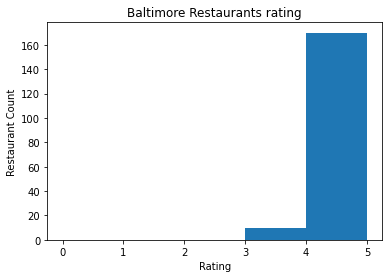

In [21]:
# Histogram for showing distribution of restaurants acroass ratings ranging from 0-5

plt.hist(baltimore_restaurants['rating'], bins = 5, range = (0,5)) # bin range = 1
plt.title('Baltimore Restaurants rating')
plt.xlabel("Rating")
plt.ylabel("Restaurant Count")

In [22]:
# Reading data from csv file

df = pd.read_csv("baltimore_restaurants.csv")

print(df[0:5])
type(df)

   Unnamed: 0                         restaurant           cuisine     price  \
0           0  DiPasqualesItalianMarketplaceDeli    Italian, Pizza  $$ - $$$   
1           1                JoeBennysFocacceria    Italian, Pizza  $$ - $$$   
2           2               CharlestonRestaurant          American      $$$$   
3           3                           LaTavola  Seafood, Italian  $$ - $$$   
4           4            ThamesStreetOysterHouse     American, Bar  $$ - $$$   

   rating  total review count  
0     5.0                 694  
1     5.0                 215  
2     4.5                 943  
3     4.5                 682  
4     4.5                2105  


pandas.core.frame.DataFrame

In [33]:
dummy=df.iloc[:,[2,4]]
#dummy
y1=pd.DataFrame(dummy.groupby('cuisine')['rating'].count())
#y1
topRating = y1.sort_values(by=['rating'], ascending=False).nlargest(10, 'rating')
type(topRating)

pandas.core.frame.DataFrame

Text(0, 0.5, 'Rating Count')

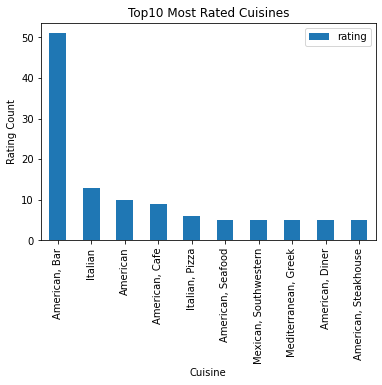

In [35]:
# Bar Chart for 10 top most ratings
plot = topRating.plot(kind='bar')
plt.title('Top10 Most Rated Cuisines')
plot.set_xlabel("Cuisine")
plot.set_ylabel("Rating Count")
#plt.savefig('Best Reviewed.png')
#plt.show()

In [25]:
dummy1=df.iloc[:,[3,4]]
#dummy
y2=pd.DataFrame(dummy1.groupby('price')['rating'].count())
#y1
topRating1 = y2.sort_values(by=['rating'], ascending=False).nlargest(10, 'rating')
topRating1
#topRating1['prices'] = topRating1['price'].str.replace('\$\$','\\$\\$')

,rating
price,
$$ - $$$,145
$$$$,23
$,11
79reviews,1


<ipython-input-26-63b7b2dbb959>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y3=pd.DataFrame(dummy2.groupby(['rating'])['total review count','rating'].mean())


Text(0, 0.5, 'Avg Review Count')

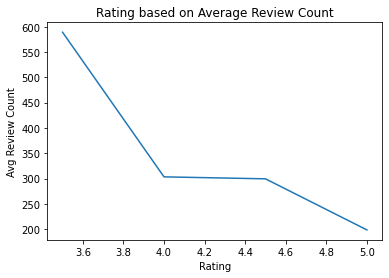

In [26]:
# Plot for Rating based on Average Review Count

dummy2=df.iloc[:,[4,5]]

y3=pd.DataFrame(dummy2.groupby(['rating'])['total review count','rating'].mean())

y3
col1=list(round(y3['rating'],2))
col2=list(round(y3['total review count'],5))


plt.plot(col1,col2)
plt.title('Rating based on Average Review Count')
plt.xlabel('Rating')
plt.ylabel('Avg Review Count')

#plt.show()

In [27]:
# Plot for most reviewed restaurants

topRating2 = df.sort_values(by=['total review count'], ascending=False).nlargest(10, 'total review count')
topRating2

,Unnamed: 0,restaurant,cuisine,price,rating,total review count
63,63,PhillipsSeafood,"American, Bar",$$ - $$$,4.0,2966
4,4,ThamesStreetOysterHouse,"American, Bar",$$ - $$$,4.5,2105
28,28,RustyScupper,"American, Seafood",$$$$,4.0,1967
13,13,MissShirleysCafeRolandPark,American,$$ - $$$,4.5,1434
17,17,MissShirleysCafeInnerHarbor,American,$$ - $$$,4.5,1267
29,29,WoodberryKitchen,American,$$$$,4.5,1217
26,26,FogoDeChaoBrazilianSteakhouse,"Steakhouse, Brazilian",$$$$,4.5,1018
54,54,PrattStreetAleHouse,"American, Bar",$$ - $$$,4.0,1010
5,5,DalesiosofLittleItalyRestaurant,Italian,$$ - $$$,4.5,993
96,96,BubbaGumpShrimpCompany,"American, Bar",$$ - $$$,3.5,969


Text(0, 0.5, 'Total Review Count')

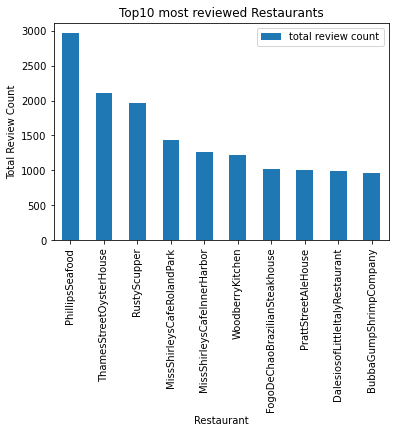

In [28]:
# Bar Chart for 10 top most reviewed Restaurants
plot = topRating2.plot(kind='bar', title='Best Movies between 2000-2017', x='restaurant', y='total review count')
plt.title('Top10 most reviewed Restaurants')
plot.set_xlabel("Restaurant")
plot.set_ylabel("Total Review Count")


In [30]:
# Other References:
# Reference for headers : https://stackoverflow.com/questions/69946941/python-beautifulsoup-web-scraping-tripadvisor-view-a-review
# Reference for span cuisine : https://intellipaat.com/community/13892/extracting-embedded-span-in-python-using-beautifulsoup
# Reference for using find_next : https://stackoverflow.com/questions/59807707/how-can-i-get-the-second-span-using-beautifulsoup-in-python
# Reference: https://iu.instructure.com/courses/2058564/files/130487187?module_item_id=25365363&fd_cookie_set=1